# Pronóstico de múltiples series temporales

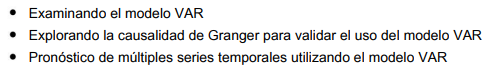

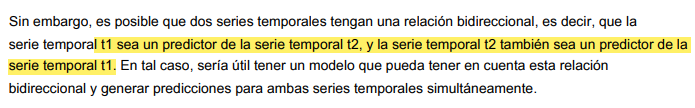

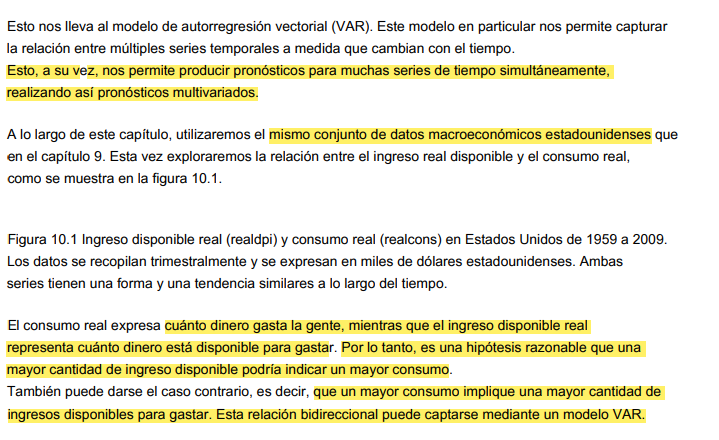

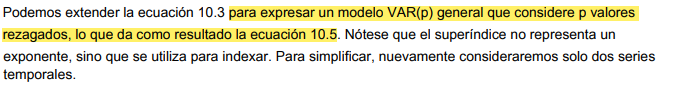

* 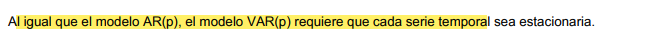

    

El modelo **VAR (Vector Autoregressive)** es una herramienta fundamental en econometría para modelar y predecir sistemas dinámicos en los que múltiples series temporales interactúan entre sí.

### **Detalles del Modelo VAR**

1. **Estructura del Modelo VAR:**
   El modelo VAR captura las relaciones dinámicas entre múltiples series temporales. Para cada serie, el valor en el tiempo \( t \) depende de sus propios rezagos (valores anteriores) y de los rezagos de otras series. 

   **Fórmula general de un modelo VAR(p) para dos series** \( y_1 \) y \( y_2 \):

   \[
   \begin{aligned}
   y_{1,t} &= c_1 + \phi_{1,1} y_{1,t-1} + \phi_{1,2} y_{2,t-1} + \epsilon_{1,t} \\
   y_{2,t} &= c_2 + \phi_{2,1} y_{1,t-1} + \phi_{2,2} y_{2,t-1} + \epsilon_{2,t}
   \end{aligned}
   \]

   Aquí:

   - \( y_{1,t} \) y \( y_{2,t} \) son las series temporales en el tiempo \( t \).
   - \( c_1 \) y \( c_2 \) son las constantes.
   - \( \phi_{i,j} \) son los coeficientes que representan la influencia de los rezagos de \( y_j \) sobre \( y_i \).
   - \( \epsilon_{1,t} \) y \( \epsilon_{2,t} \) son los términos de error o ruido blanco.

   **Por ejemplo**, si \( y_1 \) es el PBI real y \( y_2 \) es la tasa de interés, el modelo VAR captura cómo el PBI real influye en la tasa de interés y cómo la tasa de interés afecta al PBI real en el tiempo.

2. **Estacionariedad:**
   El modelo VAR requiere que las series temporales sean estacionarias, es decir, que sus propiedades estadísticas (como la media y la varianza) no cambien con el tiempo. Si las series no son estacionarias, se deben transformar (por ejemplo, utilizando diferencias) antes de aplicar el modelo.

3. **Causalidad de Granger:**
   Antes de aplicar el modelo VAR, se debe realizar una prueba de causalidad de Granger para asegurarse de que los valores pasados de una serie sean útiles para predecir la otra. Si la causalidad no es bidireccional, el modelo VAR no es adecuado y se debe usar otro modelo, como el **SARIMAX**.

4. **Selección del orden \( p \):**
   El orden \( p \) del modelo VAR indica cuántos rezagos de cada serie se deben incluir en el modelo. Para seleccionar \( p \), se pueden utilizar criterios como el **AIC (Akaike Information Criterion)**, que ayuda a encontrar el modelo más parsimonioso (el que explica los datos con el menor número de parámetros).

### **Ejemplo con PBI Real**

Supongamos que queremos modelar la relación entre el **PBI real** (denotado como \( y_1 \)) y la **tasa de interés** (denotada como \( y_2 \)) utilizando un modelo VAR.

1. **Paso 1: Recolección de Datos**
   Necesitamos obtener series temporales del **PBI real** y la **tasa de interés** para un período determinado, por ejemplo, desde 1950 hasta 2020.

2. **Paso 2: Preprocesamiento de los Datos**
   Verificamos que ambas series sean estacionarias. Si no lo son, podemos aplicar diferenciación (como diferencias primeras) para hacerlas estacionarias.

3. **Paso 3: Determinación del Orden \( p \)**
   Para determinar el orden \( p \) del modelo VAR, usamos criterios como el AIC y verificamos qué número de rezagos minimiza este valor.

4. **Paso 4: Estimación del Modelo VAR**
   Suponiendo que seleccionamos un modelo VAR(1) (un rezago), la formulación sería:

   \[
   \begin{aligned}
   PBI_{real,t} &= c_1 + \phi_{1,1} PBI_{real,t-1} + \phi_{1,2} tasa\_interés_{t-1} + \epsilon_{1,t} \\
   tasa\_interés_{t} &= c_2 + \phi_{2,1} PBI_{real,t-1} + \phi_{2,2} tasa\_interés_{t-1} + \epsilon_{2,t}
   \end{aligned}
   \]

   Aquí calculamos los coeficientes \( \phi_{i,j} \) a partir de los datos históricos de PBI real y tasa de interés.

5. **Paso 5: Prueba de Causalidad de Granger**
   Aplicamos la prueba de causalidad de Granger para verificar si la **tasa de interés** puede predecir el **PBI real** y viceversa. Si la prueba es exitosa, podemos proceder con el modelo VAR.

6. **Paso 6: Análisis de Residuos**
   Comprobamos si los residuos del modelo son ruido blanco (es decir, sin autocorrelación significativa). Si los residuos son apropiados, el modelo es válido.

7. **Paso 7: Pronósticos**
   Con el modelo VAR estimado, ahora podemos hacer pronósticos sobre el PBI real y la tasa de interés en el futuro, utilizando las ecuaciones anteriores.

### **Resumen del ejemplo: Proceso de Modelado VAR para el PBI Real**

1. **Obtenemos datos históricos** de PBI real y tasa de interés.
2. **Preprocesamos las series** para asegurarnos de que sean estacionarias.
3. **Seleccionamos el orden** \( p \) utilizando el AIC.
4. **Aplicamos el modelo VAR** para estimar las relaciones entre el PBI real y la tasa de interés.
5. **Verificamos la causalidad de Granger** para asegurarnos de que una serie pueda predecir la otra.
6. **Realizamos análisis de residuos** para validar el modelo.
7. **Usamos el modelo para hacer pronósticos** sobre el PBI real y la tasa de interés.

Este enfoque VAR te permitirá entender cómo las variables económicas interrelacionadas afectan al PBI real y hacer pronósticos sobre su comportamiento futuro.

# MODELO: 

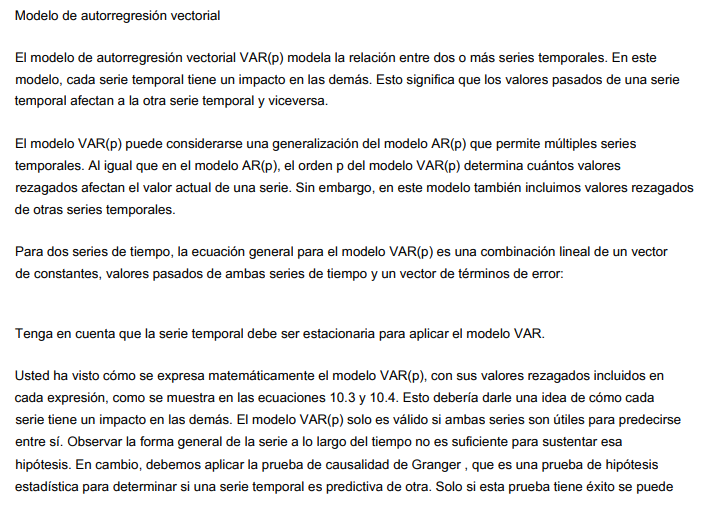

# PROCEDIMIENTO: 

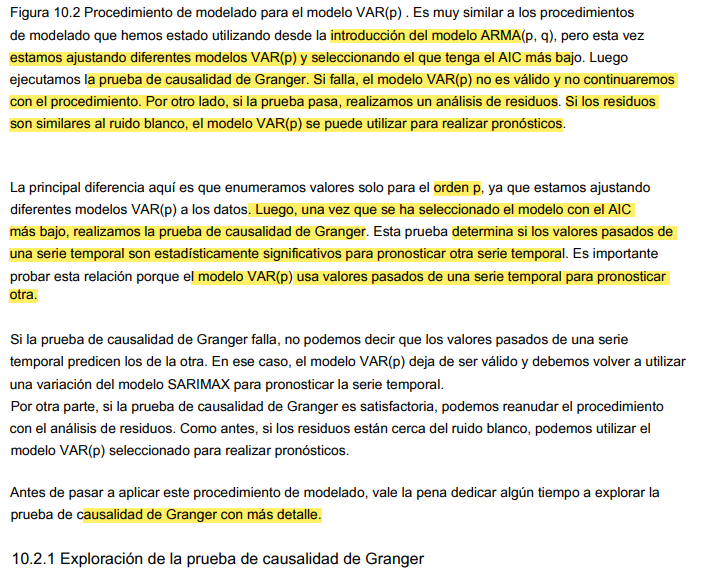

# Exploración de la prueba de causalidad de Granger

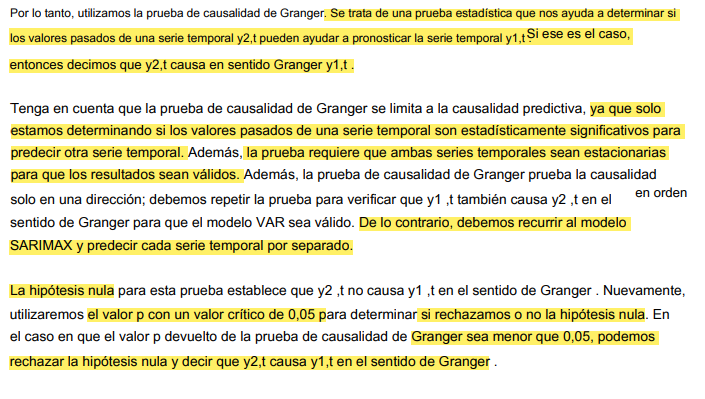

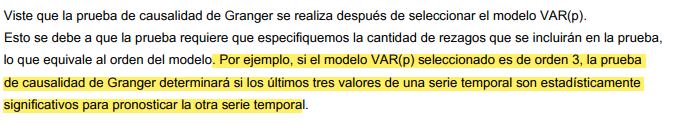

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.varmax import VARMAX
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


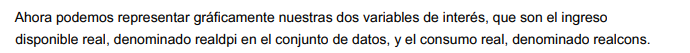

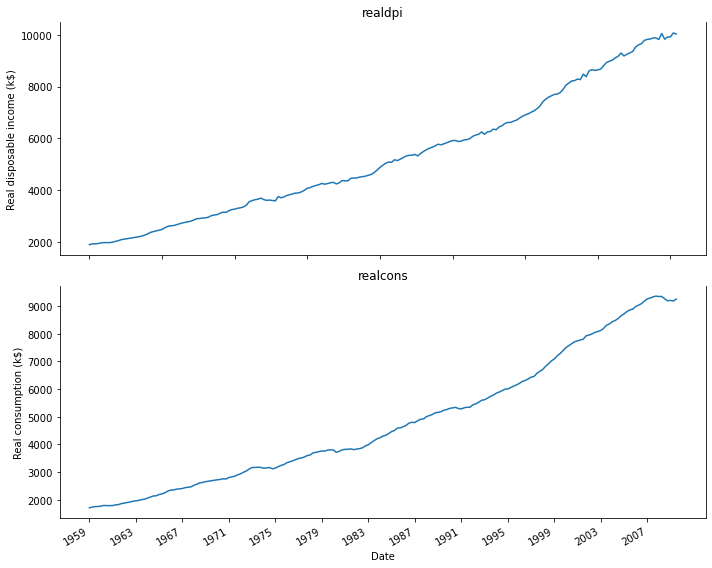

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

ax1.plot(macro_econ_data['realdpi'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Real disposable income (k$)')
ax1.set_title('realdpi')
ax1.spines['top'].set_alpha(0)

ax2.plot(macro_econ_data['realcons'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Real consumption (k$)')
ax2.set_title('realcons')
ax2.spines['top'].set_alpha(0)

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH10_F01_peixeiro.png', dpi=300)

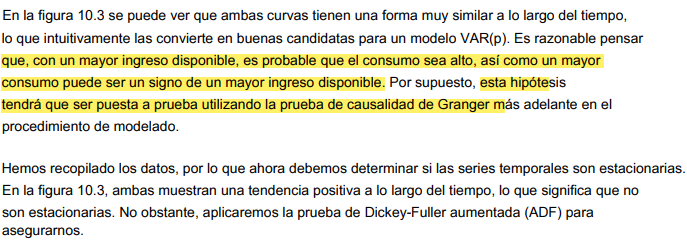

# VAR 

In [4]:
ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_econ_data['realcons'])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realdpi
ADF Statistic: 2.986025351954689
p-value: 1.0

---------------------

realcons
ADF Statistic: 1.5499123380509592
p-value: 0.9976992503412904


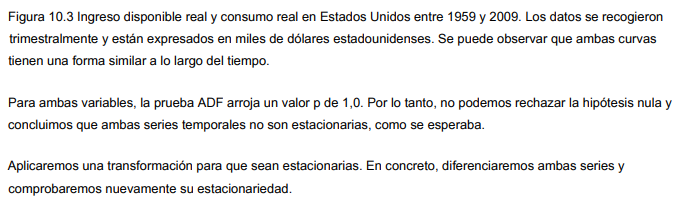

In [5]:
ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'].diff()[1:])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_econ_data['realcons'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realdpi
ADF Statistic: -8.86489334067301
p-value: 1.4493606159107938e-14

---------------------

realcons
ADF Statistic: -4.204306080845246
p-value: 0.0006479282158627595


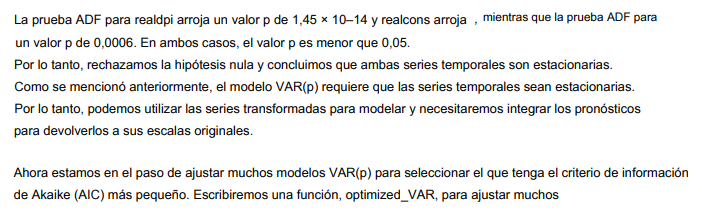

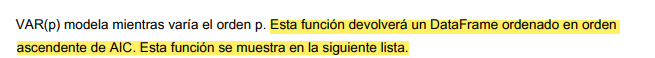

In [6]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.varmax import VARMAX

def optimize_VAR(endog: Union[pd.Series, list]) -> pd.DataFrame:
    
    results = []
    
    for i in tqdm_notebook(range(15)):
        try:
            model = VARMAX(endog, order=(i, 0)).fit(dips=False)
        except:
            continue
            
        aic = model.aic
        results.append([i, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['p', 'AIC']
    
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

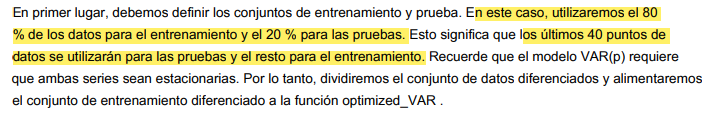

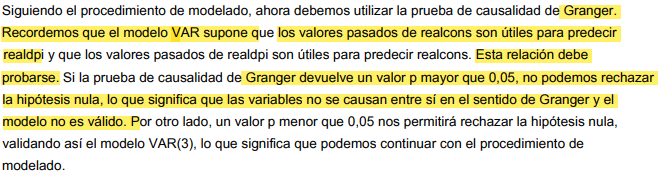

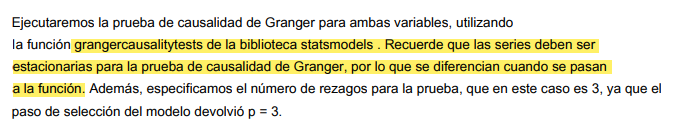

In [7]:
endog = macro_econ_data[['realdpi', 'realcons']]

endog_diff = macro_econ_data[['realdpi', 'realcons']].diff()[1:]

train = endog_diff[:162]
test = endog_diff[162:]

result_df = optimize_VAR(train)
result_df

  0%|          | 0/15 [00:00<?, ?it/s]

,p,AIC
0,3,3123.070081
1,5,3123.708523
2,6,3126.855605
3,4,3129.194044
4,2,3130.091668
5,7,3133.395639
6,1,3134.333343
7,8,3137.149012
8,9,3140.367180
9,10,3147.838708


In [8]:
print('realcons Granger-causes realdpi?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_econ_data[['realdpi', 'realcons']].diff()[1:], [3])

print('\nrealdpi Granger-causes realcons?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_econ_data[['realcons', 'realdpi']].diff()[1:], [3])

realcons Granger-causes realdpi?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=28.7191 , p=0.0000  , df=3
likelihood ratio test: chi2=26.8268 , p=0.0000  , df=3
parameter F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3

realdpi Granger-causes realcons?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=8.7625  , p=0.0326  , df=3
likelihood ratio test: chi2=8.5751  , p=0.0355  , df=3
parameter F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3


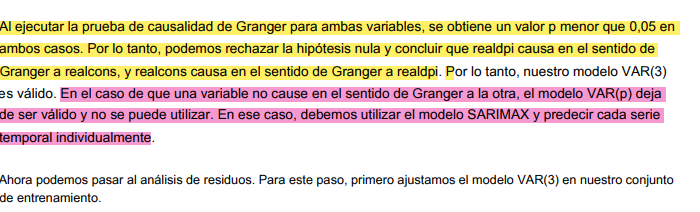

In [9]:
best_model = VARMAX(train, order=(3,0))
best_model_fit = best_model.fit(disp=False)

print(best_model_fit.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realdpi', 'realcons']   No. Observations:                  162
Model:                              VAR(3)   Log Likelihood               -1544.535
                               + intercept   AIC                           3123.070
Date:                     Tue, 07 Sep 2021   BIC                           3175.559
Time:                             15:24:22   HQIC                          3144.381
Sample:                                  0                                         
                                     - 162                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.01, 0.03   Jarque-Bera (JB):          43.85, 4.35
Prob(Q):                        0.91, 0.87   Prob(JB):                   0.00, 0.11
Heteroskedasticity (H):         4.44, 3.59   Skew:                      0.14

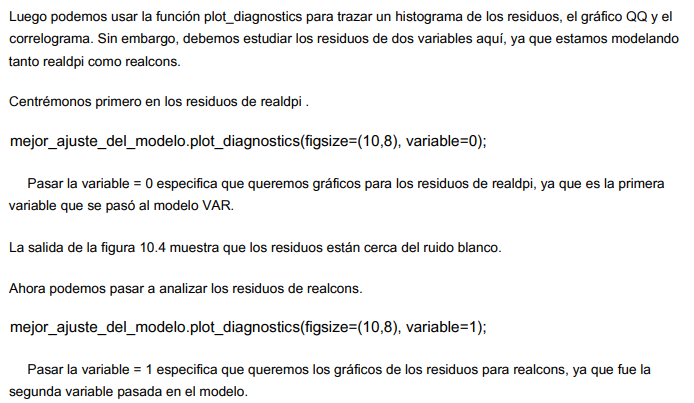

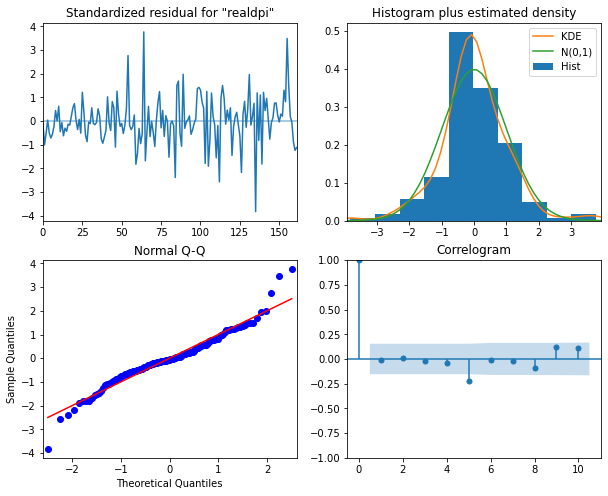

In [10]:
# realdpi
best_model_fit.plot_diagnostics(figsize=(10,8), variable=0);

plt.savefig('figures/CH10_F04_peixeiro.png', dpi=300)

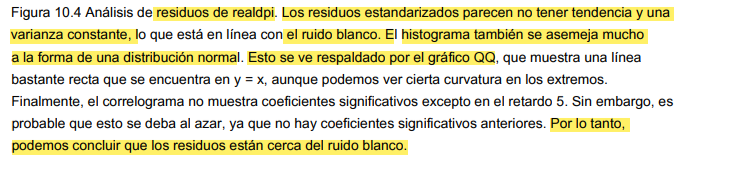

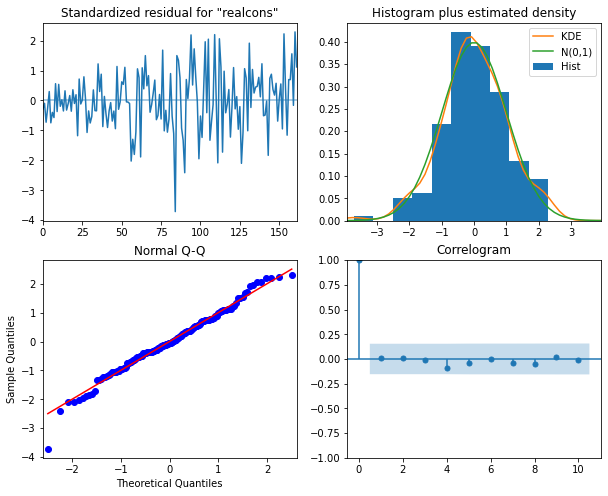

In [11]:
# realcons
best_model_fit.plot_diagnostics(figsize=(10,8), variable=1);

plt.savefig('figures/CH10_F05_peixeiro.png', dpi=300)

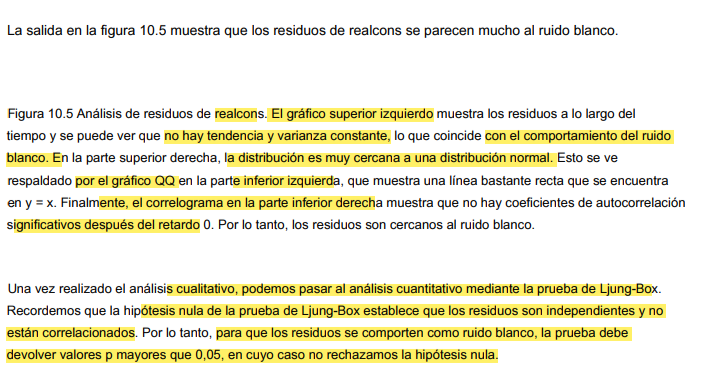

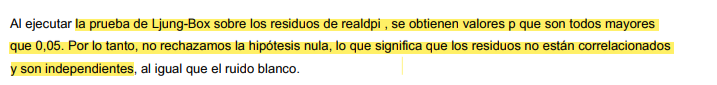



In [12]:
realgdp_residuals = best_model_fit.resid['realdpi']

lbvalue, pvalue = acorr_ljungbox(realgdp_residuals, np.arange(1, 11, 1))

print(pvalue)

[0.91405261 0.98537862 0.9945855  0.98423356 0.10348741 0.16445201
 0.23379802 0.21253698 0.14870227 0.12191099]


In [13]:
realcons_residuals = best_model_fit.resid['realcons']

lbvalue, pvalue = acorr_ljungbox(realcons_residuals, np.arange(1, 11, 1))

print(pvalue)

[0.87794847 0.96629006 0.99531248 0.99358636 0.99592666 0.99241196
 0.9945818  0.97605013 0.98252595 0.99168257]


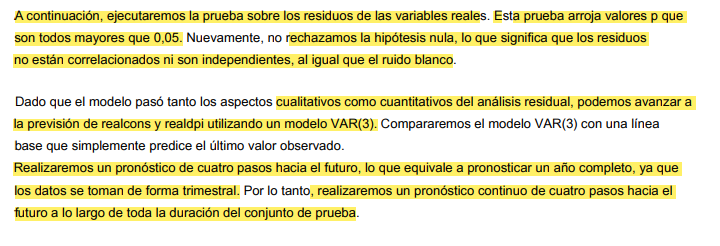

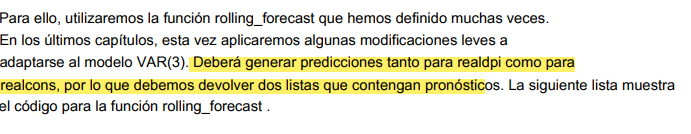

In [37]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'VAR':

        realdpi_pred_VAR = []
        realcons_pred_VAR = []
        
        for i in range(train_len, total_len, window):
            model = VARMAX(df[:i], order=(3,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            
            oos_pred_realdpi = predictions.predicted_mean.iloc[-window:]['realdpi']
            oos_pred_realcons = predictions.predicted_mean.iloc[-window:]['realcons']
            
            realdpi_pred_VAR.extend(oos_pred_realdpi)
            realcons_pred_VAR.extend(oos_pred_realcons)
        
        return realdpi_pred_VAR, realcons_pred_VAR
    
    elif method == 'last':
        realdpi_pred_last = []
        realcons_pred_last = []
        
        for i in range(train_len, total_len, window):
            
            realdpi_last = df[:i].iloc[-1]['realdpi']
            realcons_last = df[:i].iloc[-1]['realcons']
            
            realdpi_pred_last.extend(realdpi_last for _ in range(window))
            realcons_pred_last.extend(realcons_last for _ in range(window))
            
        return realdpi_pred_last, realcons_pred_last

In [38]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 4

realdpi_pred_VAR, realcons_pred_VAR = recursive_forecast(endog_diff, TRAIN_LEN, HORIZON, WINDOW, 'VAR')

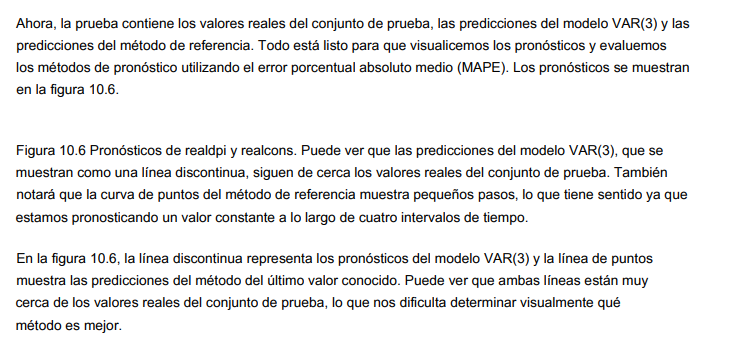

In [39]:
test = endog[163:]

test['realdpi_pred_VAR'] = pd.Series()
test['realdpi_pred_VAR'] = endog.iloc[162]['realdpi'] + np.cumsum(realdpi_pred_VAR)

test['realcons_pred_VAR'] = pd.Series()
test['realcons_pred_VAR'] = endog.iloc[162]['realcons'] + np.cumsum(realcons_pred_VAR)

test

,realdpi,realcons,realdpi_pred_VAR,realcons_pred_VAR
163,7887.7,7389.2,7829.225426,7354.324923
164,8053.4,7501.3,7897.191791,7430.257788
165,8135.9,7571.8,7960.567992,7496.633202
166,8222.3,7645.9,8014.759416,7556.617892
167,8234.6,7713.5,8080.705065,7631.000039
168,8296.5,7744.3,8142.394234,7692.847380
169,8273.7,7773.5,8200.124659,7753.866075
170,8484.5,7807.7,8259.362406,7812.532650
171,8385.5,7930.0,8264.386386,7864.633238
172,8611.6,7957.3,8320.858709,7895.057974


In [40]:
realdpi_pred_last, realcons_pred_last = recursive_forecast(endog, TRAIN_LEN, HORIZON, WINDOW, 'last')

test['realdpi_pred_last'] = realdpi_pred_last
test['realcons_pred_last'] = realcons_pred_last

test

,realdpi,realcons,realdpi_pred_VAR,realcons_pred_VAR,realdpi_pred_last,realcons_pred_last
163,7887.7,7389.2,7829.225426,7354.324923,7716.0,7199.9
164,8053.4,7501.3,7897.191791,7430.257788,7716.0,7199.9
165,8135.9,7571.8,7960.567992,7496.633202,7716.0,7199.9
166,8222.3,7645.9,8014.759416,7556.617892,7716.0,7199.9
167,8234.6,7713.5,8080.705065,7631.000039,8135.9,7571.8
168,8296.5,7744.3,8142.394234,7692.847380,8135.9,7571.8
169,8273.7,7773.5,8200.124659,7753.866075,8135.9,7571.8
170,8484.5,7807.7,8259.362406,7812.532650,8135.9,7571.8
171,8385.5,7930.0,8264.386386,7864.633238,8273.7,7773.5
172,8611.6,7957.3,8320.858709,7895.057974,8273.7,7773.5


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

ax1.plot(macro_econ_data['realdpi'])
ax1.plot(test['realdpi_pred_VAR'], 'k--', label='VAR')
ax1.plot(test['realdpi_pred_last'], 'r:', label='last')
ax1.set_xlabel('Date')
ax1.set_ylabel('Real disposable income ($))')
ax1.set_title('realdpi')
ax1.spines['top'].set_alpha(0)
ax1.axvspan(163, 202, color='#808080', alpha=0.2)
ax1.set_xlim(100, 202)
ax1.legend(loc=2)

ax2.plot(macro_econ_data['realcons'])
ax2.plot(test['realcons_pred_VAR'], 'k--', label='VAR')
ax2.plot(test['realcons_pred_last'], 'r:', label='last')
ax2.set_xlabel('Date')
ax2.set_ylabel('Real consumption (k$)')
ax2.set_title('realcons')
ax2.spines['top'].set_alpha(0)
ax2.axvspan(163, 202, color='#808080', alpha=0.2)
ax2.set_xlim(100, 202)
ax2.legend(loc=2)

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))
plt.xlim(100, 202)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH10_F06_peixeiro.png', dpi=300)



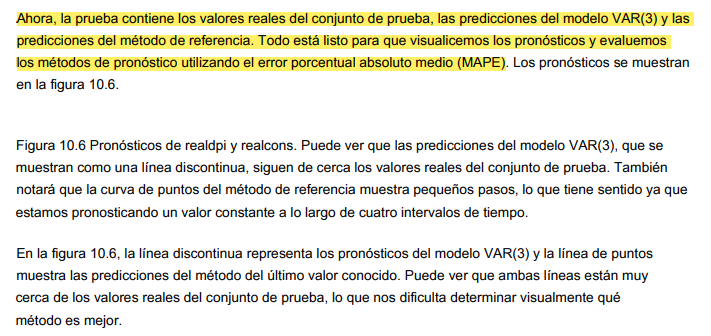

In [42]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [43]:
mape_realdpi_VAR = mape(test['realdpi'], test['realdpi_pred_VAR'])
mape_realdpi_last = mape(test['realdpi'], test['realdpi_pred_last'])

mape_realcons_VAR = mape(test['realcons'], test['realcons_pred_VAR'])
mape_realcons_last = mape(test['realcons'], test['realcons_pred_last'])

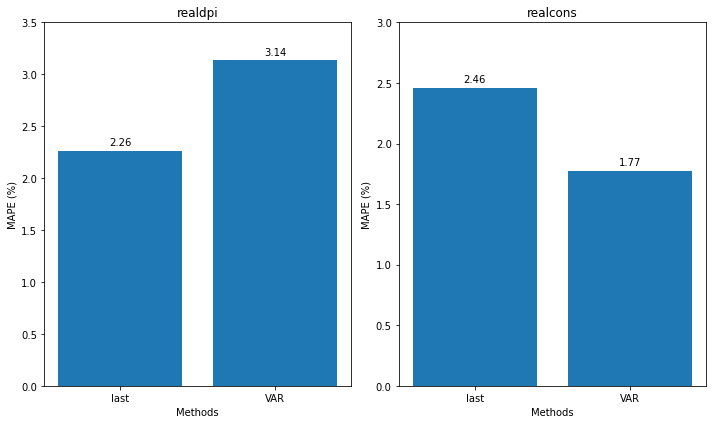

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

x = ['last', 'VAR']
y1 = [mape_realdpi_last, mape_realdpi_VAR]
y2 = [mape_realcons_last, mape_realcons_VAR]

ax1.bar(x, y1)
ax1.set_xlabel('Methods')
ax1.set_ylabel('MAPE (%)')
ax1.set_title('realdpi')
ax1.set_ylim(0, 3.5)

ax2.bar(x,y2)
ax2.set_xlabel('Methods')
ax2.set_ylabel('MAPE (%)')
ax2.set_title('realcons')
ax2.set_ylim(0, 3)

for index, value in enumerate(y1):
    ax1.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')
    
for index, value in enumerate(y2):
    ax2.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH10_F07_peixeiro.png', dpi=300)

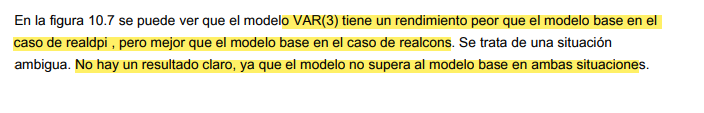

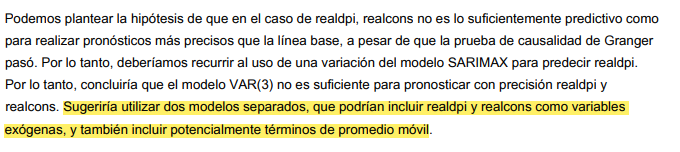

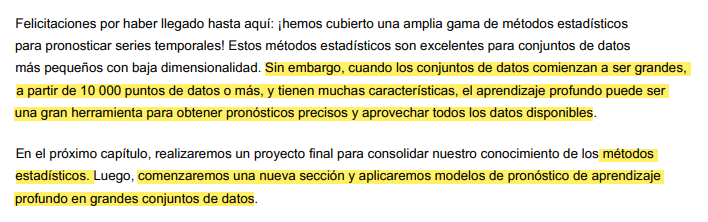